# Wine Classification 
This notebook builds a neural network model that can predict the class of wine given the 13 measured parameters

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
pd.set_option("display.max_rows", None, "display.max_columns", None)
%matplotlib inline 

In [2]:
 #Load the wine dataset in a variable named raw_data
raw_data = load_wine()

#Convert the wine dataset to a data frame and get features.
features = pd.DataFrame(data=raw_data['data'],columns=raw_data['feature_names'])
data = features

#Get the target values
data['target']=raw_data['target']
data['class']=data['target'].map(lambda ind: raw_data['target_names'][ind])

data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,class_0


In [3]:
data['class'].unique()

array(['class_0', 'class_1', 'class_2'], dtype=object)

In [4]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


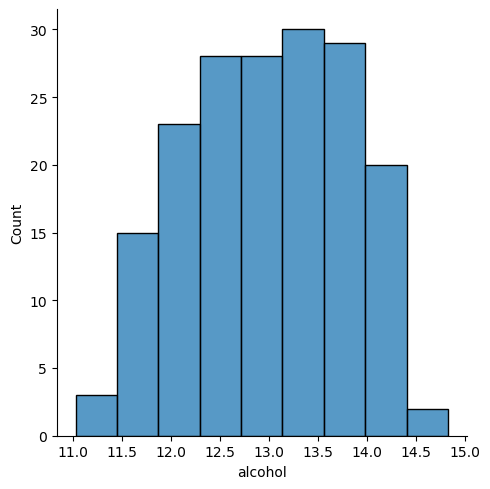

In [5]:
sns.displot(data['alcohol'],kde=0) #distribution of alcohol content among all of the wines

In [6]:
data.shape

(178, 15)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [8]:
data.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
class                           0
dtype: int64

In [9]:
# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(raw_data['data'],raw_data['target'], test_size=0.3, random_state=42)
print(len(X_train),' samples in training data\n',
      len(X_test),' samples in test data\n', )

124  samples in training data
 54  samples in test data



In [10]:
# Instantiate the model
model = MLPClassifier(hidden_layer_sizes=(50,50,50),activation='relu', solver='adam', random_state=1, max_iter=3000, verbose=True).fit(X_train, y_train)

# Fit the model
model.fit(X_train, y_train)

# Make pickle file of our model
pickle.dump(model, open("model.pkl", "wb"))

Iteration 1, loss = 26.16076674
Iteration 2, loss = 26.05295925
Iteration 3, loss = 23.35527994
Iteration 4, loss = 17.78857492
Iteration 5, loss = 12.93221375
Iteration 6, loss = 14.76845331
Iteration 7, loss = 15.84893232
Iteration 8, loss = 13.58065896
Iteration 9, loss = 8.56199341
Iteration 10, loss = 16.01360190
Iteration 11, loss = 19.53544496
Iteration 12, loss = 20.71319932
Iteration 13, loss = 20.62331325
Iteration 14, loss = 19.48991509
Iteration 15, loss = 17.03033271
Iteration 16, loss = 12.89523580
Iteration 17, loss = 7.48564608
Iteration 18, loss = 7.11970588
Iteration 19, loss = 9.72348582
Iteration 20, loss = 9.70038741
Iteration 21, loss = 8.27044208
Iteration 22, loss = 8.58623813
Iteration 23, loss = 9.14069225
Iteration 24, loss = 7.33427247
Iteration 25, loss = 3.63150696
Iteration 26, loss = 5.01608808
Iteration 27, loss = 6.75363043
Iteration 28, loss = 7.06884440
Iteration 29, loss = 6.11647826
Iteration 30, loss = 4.62094526
Iteration 31, loss = 5.87056677
It

Iteration 282, loss = 0.41280169
Iteration 283, loss = 0.41138815
Iteration 284, loss = 0.41479878
Iteration 285, loss = 0.43541515
Iteration 286, loss = 0.41957048
Iteration 287, loss = 0.41318919
Iteration 288, loss = 0.41282945
Iteration 289, loss = 0.40608937
Iteration 290, loss = 0.41104110
Iteration 291, loss = 0.40236509
Iteration 292, loss = 0.40682483
Iteration 293, loss = 0.39835858
Iteration 294, loss = 0.40187987
Iteration 295, loss = 0.39524559
Iteration 296, loss = 0.39855594
Iteration 297, loss = 0.39272312
Iteration 298, loss = 0.39433040
Iteration 299, loss = 0.38955527
Iteration 300, loss = 0.39029237
Iteration 301, loss = 0.38692832
Iteration 302, loss = 0.38657438
Iteration 303, loss = 0.38405070
Iteration 304, loss = 0.38299483
Iteration 305, loss = 0.38100263
Iteration 306, loss = 0.37950981
Iteration 307, loss = 0.37749040
Iteration 308, loss = 0.37511426
Iteration 309, loss = 0.37374274
Iteration 310, loss = 0.37087586
Iteration 311, loss = 0.36971021
Iteration 

Iteration 537, loss = 0.13668641
Iteration 538, loss = 0.13650983
Iteration 539, loss = 0.13612661
Iteration 540, loss = 0.13562483
Iteration 541, loss = 0.13511906
Iteration 542, loss = 0.13476724
Iteration 543, loss = 0.13461832
Iteration 544, loss = 0.13461329
Iteration 545, loss = 0.13462457
Iteration 546, loss = 0.13453394
Iteration 547, loss = 0.13430392
Iteration 548, loss = 0.13396344
Iteration 549, loss = 0.13361849
Iteration 550, loss = 0.13335833
Iteration 551, loss = 0.13320323
Iteration 552, loss = 0.13311657
Iteration 553, loss = 0.13303926
Iteration 554, loss = 0.13291709
Iteration 555, loss = 0.13272898
Iteration 556, loss = 0.13249237
Iteration 557, loss = 0.13224562
Iteration 558, loss = 0.13202335
Iteration 559, loss = 0.13184340
Iteration 560, loss = 0.13169633
Iteration 561, loss = 0.13156695
Iteration 562, loss = 0.13144140
Iteration 563, loss = 0.13130443
Iteration 564, loss = 0.13115100
Iteration 565, loss = 0.13098048
Iteration 566, loss = 0.13079935
Iteration 

Iteration 817, loss = 0.06731400
Iteration 818, loss = 0.06736175
Iteration 819, loss = 0.06721282
Iteration 820, loss = 0.06690659
Iteration 821, loss = 0.06663389
Iteration 822, loss = 0.06612135
Iteration 823, loss = 0.06582706
Iteration 824, loss = 0.06563022
Iteration 825, loss = 0.06546547
Iteration 826, loss = 0.06552683
Iteration 827, loss = 0.06549101
Iteration 828, loss = 0.06550875
Iteration 829, loss = 0.06542551
Iteration 830, loss = 0.06519509
Iteration 831, loss = 0.06509997
Iteration 832, loss = 0.06477144
Iteration 833, loss = 0.06461471
Iteration 834, loss = 0.06438258
Iteration 835, loss = 0.06425518
Iteration 836, loss = 0.06421506
Iteration 837, loss = 0.06405692
Iteration 838, loss = 0.06387721
Iteration 839, loss = 0.06387146
Iteration 840, loss = 0.06370918
Iteration 841, loss = 0.06363100
Iteration 842, loss = 0.06360972
Iteration 843, loss = 0.06341908
Iteration 844, loss = 0.06343200
Iteration 845, loss = 0.06334038
Iteration 846, loss = 0.06327314
Iteration 

Iteration 226, loss = 0.48718664
Iteration 227, loss = 0.48618776
Iteration 228, loss = 0.48514693
Iteration 229, loss = 0.48417231
Iteration 230, loss = 0.48318959
Iteration 231, loss = 0.48217163
Iteration 232, loss = 0.48114574
Iteration 233, loss = 0.48017071
Iteration 234, loss = 0.47913907
Iteration 235, loss = 0.47813862
Iteration 236, loss = 0.47713387
Iteration 237, loss = 0.47612853
Iteration 238, loss = 0.47507196
Iteration 239, loss = 0.47403402
Iteration 240, loss = 0.47309852
Iteration 241, loss = 0.47198578
Iteration 242, loss = 0.47097480
Iteration 243, loss = 0.46994864
Iteration 244, loss = 0.46880969
Iteration 245, loss = 0.46762941
Iteration 246, loss = 0.46602798
Iteration 247, loss = 0.46493396
Iteration 248, loss = 0.46386544
Iteration 249, loss = 0.46269895
Iteration 250, loss = 0.46114601
Iteration 251, loss = 0.45923504
Iteration 252, loss = 0.45782573
Iteration 253, loss = 0.45619630
Iteration 254, loss = 0.45453650
Iteration 255, loss = 0.45286032
Iteration 

Iteration 537, loss = 0.13668641
Iteration 538, loss = 0.13650983
Iteration 539, loss = 0.13612661
Iteration 540, loss = 0.13562483
Iteration 541, loss = 0.13511906
Iteration 542, loss = 0.13476724
Iteration 543, loss = 0.13461832
Iteration 544, loss = 0.13461329
Iteration 545, loss = 0.13462457
Iteration 546, loss = 0.13453394
Iteration 547, loss = 0.13430392
Iteration 548, loss = 0.13396344
Iteration 549, loss = 0.13361849
Iteration 550, loss = 0.13335833
Iteration 551, loss = 0.13320323
Iteration 552, loss = 0.13311657
Iteration 553, loss = 0.13303926
Iteration 554, loss = 0.13291709
Iteration 555, loss = 0.13272898
Iteration 556, loss = 0.13249237
Iteration 557, loss = 0.13224562
Iteration 558, loss = 0.13202335
Iteration 559, loss = 0.13184340
Iteration 560, loss = 0.13169633
Iteration 561, loss = 0.13156695
Iteration 562, loss = 0.13144140
Iteration 563, loss = 0.13130443
Iteration 564, loss = 0.13115100
Iteration 565, loss = 0.13098048
Iteration 566, loss = 0.13079935
Iteration 

Iteration 823, loss = 0.06582706
Iteration 824, loss = 0.06563022
Iteration 825, loss = 0.06546547
Iteration 826, loss = 0.06552683
Iteration 827, loss = 0.06549101
Iteration 828, loss = 0.06550875
Iteration 829, loss = 0.06542551
Iteration 830, loss = 0.06519509
Iteration 831, loss = 0.06509997
Iteration 832, loss = 0.06477144
Iteration 833, loss = 0.06461471
Iteration 834, loss = 0.06438258
Iteration 835, loss = 0.06425518
Iteration 836, loss = 0.06421506
Iteration 837, loss = 0.06405692
Iteration 838, loss = 0.06387721
Iteration 839, loss = 0.06387146
Iteration 840, loss = 0.06370918
Iteration 841, loss = 0.06363100
Iteration 842, loss = 0.06360972
Iteration 843, loss = 0.06341908
Iteration 844, loss = 0.06343200
Iteration 845, loss = 0.06334038
Iteration 846, loss = 0.06327314
Iteration 847, loss = 0.06331821
Iteration 848, loss = 0.06330328
Iteration 849, loss = 0.06338958
Iteration 850, loss = 0.06355129
Iteration 851, loss = 0.06368354
Iteration 852, loss = 0.06389264
Iteration 

In [11]:
print(model.score(X_train, y_train))

0.9838709677419355


In [12]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2])

In [13]:
y_test

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2])

In [14]:
print(model.score(X_test, y_test))

0.9814814814814815


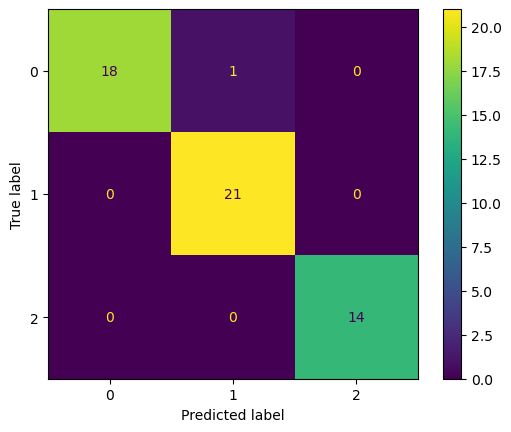

In [15]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

plt.show()